# METODI PREDITTIVI


09/04/2024

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn

# Parte 1. Regressione Lineare 

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

Importiamo il dataset:

In [2]:
integrate_titles = pd.read_csv('integrate_titles_3.csv')

visualizziamo il dataset

In [3]:
integrate_titles.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
0,1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
1,2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
2,3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
3,4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
4,5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


In [4]:
integrate_titles.info()
#togliamo le righe che hanno valori nulli su tmdb_score
integrate_titles=integrate_titles.dropna(axis=0, subset=['tmdb_score'])
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

Supponiamo di voler stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. Prima di tutto, possiamo utilizzare una rappresentazione grafica per verificare se le due features siano correlate, e se sia quindi possibile utilizzare una di queste features per predire l'altra. 


Text(0, 0.5, 'imdb_score')

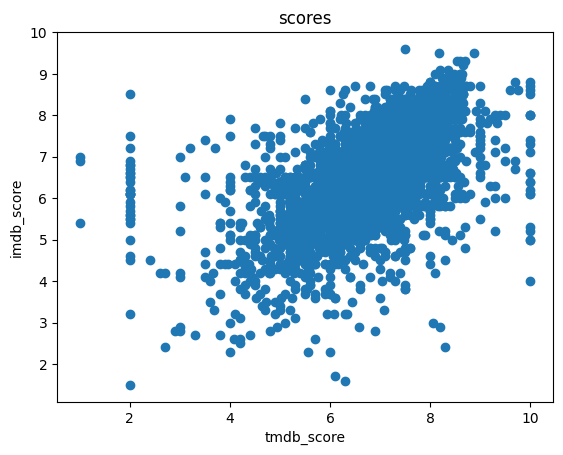

In [5]:
plt.scatter(integrate_titles['tmdb_score'], integrate_titles['imdb_score'])
plt.title('scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')

verifichiamo la correlazione utilizzando il coefficiente di correlazione di Pearson (r). 

Vi ricordo che r ha valori nell'intervallo [-1,1].  

Inoltre:

r in [0,0.3] debole correlazione;

r in [0.3,0.7] moderata correlazione;

r in [0.7,1] forte correlazione; 

i valori negativi del coefficiente di correlazione indicano una correlazione inversa, cioè all'aumentare di una caratteristica diminuisce l'altra e viceversa. 


In [6]:
correlation, p_value = stats.pearsonr(integrate_titles['tmdb_score'],integrate_titles['imdb_score'])
print("Coefficiente di Pearson: ", correlation)

Coefficiente di Pearson:  0.591232934435519


plottiamo in falsi colori

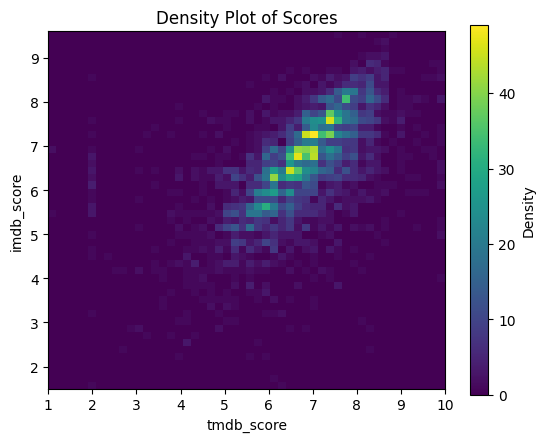

In [7]:
# Calcoliamo una rappresentazione a griglia della densità dei punti
x = integrate_titles['tmdb_score']
y = integrate_titles['imdb_score']
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plottiamo il grafico a dispersione in falsi colori
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.title('Density Plot of Scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.show()

Ora ci chiediamo, quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. 

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua).

Possiamo quindi utilizzare un modello di Regressione lineare.

Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

* Training Set -> porzione di dati che utilizziamo per il training del nostro modello di regressione lineare;

* Validation Set -> porzione di dati che utilizziamo per valutare il nostro modello precedentemente allenato.

Non esiste un unico modo per dividere il dataset in training e validation, normalmente, si utilizza un random split con una certa percentuale (per esempio 70/30 per training/test).


Usiamo la libreria scikit-learn, lo schema che dovrete usare e' il seguente:

1. Definire le caratteristiche da usare;
2. Definire X e y; 
3. Dividere il dataset in training e validation; 
4. Istanziare un oggetto della classe LinearRegression;
5. Allenare usando la funzione fit invocata sull'oggetto istanziato (passando il training set!);
6. Visualizzare i coefficienti imparati: useremo gli attributi *intercept_=* e *coef_* sull'oggetto ottenuto come output della funzione fit.

In scikit-learn esiste la funzione:

    X_train, X_valid, y_train, y_valid = train_test_split(X, y)

che effettua per noi lo splitting.

In [8]:
from sklearn.model_selection import train_test_split
#codice qui 
# Definiamo le caratteristiche da usare
X = integrate_titles[['tmdb_score']] #tmdb_score sarà il nostro predittore
y = integrate_titles['imdb_score'] #imdb_score sarà la variabile da predire (target)

# Dividiamo il dataset in training set e validation set usando la proporzione 70/30
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

adesso implementiamo la regressione

In [9]:
from sklearn.linear_model import LinearRegression
# Istanziamo l'oggetto della classe LinearRegression
regressor = LinearRegression()

# Alleniamo il modello passando il training set
regressor.fit(X_train, y_train)

# Visualizziamo i coefficienti imparati
print("Intercept:", regressor.intercept_)
#usiamo l'indexing e prendiamo il primo (e unico) coefficiente, ma se avessimo più variabili predittive (altre oltre imdb_score)
#potremmo accedere ai coefficienti relativi a tutte in questo array
print("Coefficiente tmdb_score", regressor.coef_[0]) 

Intercept: 2.470772316986527
Coefficiente tmdb_score 0.609145669459637


il risultato ottenuto sembra indicare che, ad un aumento di una unità del tmdb_score sia associato un aumento di circa 0.609 nell'imdb_score previsto

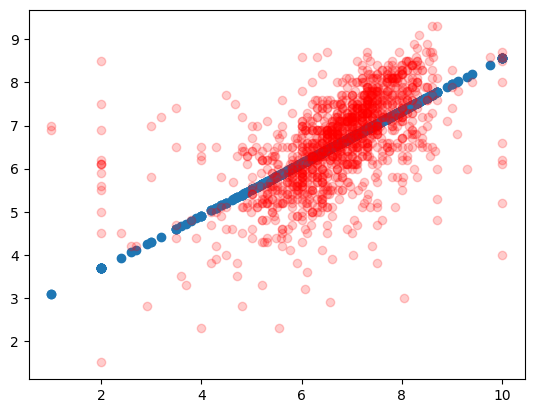

In [10]:
y_hat =regressor.predict(X_valid)

plt.scatter(X_valid,y_hat)
plt.scatter(X_valid,y_valid,c='r',alpha=0.2)

Ora, come possiamo stimare la precisione della funzione che abbiamo imparato?

Sappiamo che non esiste una soluzione perfetta, ma possiamo trovare la soluzione migliore possibile, con i dati a disposizione. Per trovarla, useremo stime degli errori.

Abbiamo visto che ci sono tre metriche per valutare i modelli a regressione di machine learning:

lo scarto medio assoluto (MAE - Mean Absolute Error);
l’errore quadratico medio (MSE - Mean Squared Error);
la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).
ESERCIZIO: scrivete una funzione che implementi ciascuna delle tre metriche sopra descritte.

In [11]:
def MSE (y_pred,y_true):
    #errore quadratico medio
    mse = np.mean((y_pred - y_true) ** 2)
    return mse 

def MAE (y_pred,y_true):
    #scarto medio assoluto
    mae = np.mean(np.abs(y_pred - y_true))
    return mae


def RMSE (y_pred,y_true):
    #radice quadrata dell'errore quadratico medio
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    return rmse

usate le tre funzioni appena definite, per calcolare le tre metriche sul modello di regressione lineare appena ottenuto (sul validation set)

In [12]:
#MAE
mae = MAE(y_hat, y_valid)


#MSE
mse = MSE(y_hat, y_valid)


#RMSE
rmse = RMSE(y_hat, y_valid)

print("Scarto medio assoluto: ", mae)
print("Errore quadratico medio: ", mse)
print("Radice quadrata dell'errore quadratico medio: ", rmse)

Scarto medio assoluto:  0.6654888576448802
Errore quadratico medio:  0.8118156586283207
Radice quadrata dell'errore quadratico medio:  0.9010081346071859


possiamo anche utilizzare le funzioni messe a disposizione da scikit-learn.

In [13]:
import sklearn.metrics as metrics 
y_pred = regressor.predict(X_valid)
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 0.6654888576448802
MSE: 0.8118156586283207
RMSE: 0.9010081346071859


Come faccio a sapere se questo risultato e' un buon risultato oppure no?

Determiniamo il modello nullo.

il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello.

Nella regressione, possiamo sostituire tutti i valori della feature imdb_score con la media sull'intero dataset.

In [14]:
#calcolate lo score medio
mean_imdb_score = integrate_titles['imdb_score'].mean()


# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y = [mean_imdb_score] * y_valid.shape[0]

# Calcoliamo l'errore assoluto medio (MAE) del modello nullo
null_mae = MAE(null_model_y, y_valid)

# Calcoliamo l'errore quadratico medio (MSE) del modello nullo
null_mse = MSE(null_model_y, y_valid)

# Calcoliamo la radice dell'errore quadratico medio (RMSE) del modello nullo
null_rmse = RMSE(null_model_y, y_valid)


#stampate gli errori
print("Scarto medio assoluto (MAE):", null_mae)
print("Errore quadratico medio (MSE):", null_mse)
print("Radice dell'errore quadratico medio (RMSE):", null_rmse)


Scarto medio assoluto (MAE): 0.8576188819551651
Errore quadratico medio (MSE): 1.1808479821577298
Radice dell'errore quadratico medio (RMSE): 1.086668294447634


notiamo che il nostro modello (seppur non sia chissà quanto preciso) è "sicuramente meglio che tirare ad indovinare", perché i valori sul nostro modello sono più bassi che sul modello nullo

ESERCIZIO.

* Adesso, utilizzate come test set la tabella amazon_titles. 

1. Pulite e preparate il dataset;

2. Applicate il modello di regressione imparato;

3. Sfruttate errori a dispozione e modello nullo per determinare se riusciamo a generalizzare bene verso questo set di dati.

In [15]:
amazon_titles = pd.read_csv('amazon_titles.csv')

In [16]:
amazon_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467240.0,32.667,8.263
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60874.0,9.013,7.357
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1147.0,15.424,7.600
3,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32154.0,12.400,7.400
4,ts37076,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,NaN,30,['comedy'],['US'],21.0,tt0042116,8.6,1527.0,7.394,7.500


In [17]:
#verifichiamo elementi nulli ed eliminiamo
null_values_imdb = amazon_titles['imdb_score'].isnull().sum()
print("numero di Valori Null di imdb_score: ", null_values_imdb)
null_values_tmdb = amazon_titles['tmdb_score'].isnull().sum()
print("numero di Valori Null di tmdb_score: ", null_values_tmdb)

amazon_titles = amazon_titles.dropna(axis=0, subset=['imdb_score'])
amazon_titles = amazon_titles.dropna(axis=0, subset=['tmdb_score'])

null_values_imdb = amazon_titles['imdb_score'].isnull().sum()
print("numero di Valori Null di imdb_score dopo dropna: ", null_values_imdb)
null_values_tmdb = amazon_titles['tmdb_score'].isnull().sum()
print("numero di Valori Null di tmdb_score dopo dropna: ", null_values_tmdb)

numero di Valori Null di imdb_score:  1103
numero di Valori Null di tmdb_score:  2115
numero di Valori Null di imdb_score dopo dropna:  0
numero di Valori Null di tmdb_score dopo dropna:  0


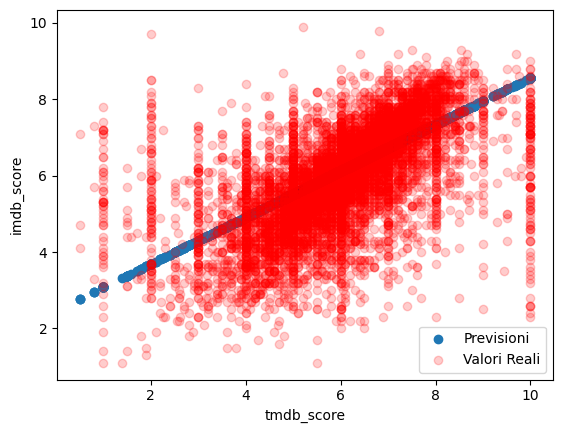

In [18]:
#applichiamo il modello imparato
y_pred_test = regressor.predict(amazon_titles[['tmdb_score']])

#visualizziamo
plt.scatter(amazon_titles['tmdb_score'], y_pred_test, label='Previsioni')
plt.scatter(amazon_titles['tmdb_score'], amazon_titles['imdb_score'], label='Valori Reali', c='r', alpha=0.2)
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.legend()
plt.show()

calcoliamo gli errori corrispondenti

In [19]:
import sklearn.metrics as metrics 

print ('MAE:', metrics.mean_absolute_error(y_pred_test, amazon_titles['imdb_score']))
print ('MSE:', metrics.mean_squared_error(y_pred_test, amazon_titles['imdb_score']))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred_test, amazon_titles['imdb_score'])))

MAE: 0.8077320071894704
MSE: 1.2433450325374917
RMSE: 1.115053824950837


In [20]:
#calcolate lo score medio
mean_imdb_score_test = amazon_titles['imdb_score'].mean()

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y_test = [mean_imdb_score_test] * len(amazon_titles)

#calcoliamo errori
null_mae_test = metrics.mean_absolute_error(null_model_y_test, amazon_titles['imdb_score'])
null_mse_test = metrics.mean_squared_error(null_model_y_test,amazon_titles['imdb_score'])
null_rmse_test  =np.sqrt(metrics.mean_squared_error(null_model_y_test, amazon_titles['imdb_score']))

#visualizziamo gli errori
print("Metriche di valutazione del modello nullo sul dataset di test:")
print("Scarto medio assoluto (MAE):", null_mae_test)
print("Errore quadratico medio (MSE):", null_mse_test)
print("Radice dell'errore quadratico medio (RMSE):", null_rmse_test)

Metriche di valutazione del modello nullo sul dataset di test:
Scarto medio assoluto (MAE): 1.0678085169475153
Errore quadratico medio (MSE): 1.7812227138859158
Radice dell'errore quadratico medio (RMSE): 1.3346245591498442


cosa pensate del modello imparato? traete le opportune conclusioni.
Sembra che il modello imparato, una volta testato con un dataset di test, non sia particolarmente efficace, in quanto ha dei valori di MAE, MSE, RMSE abbastanza alti (anche confrontati con quelli di validation), ma è sicuramente meglio del modello nullo

# Parte 2. Regressione Logistica 

Adesso, proviamo a risolvere un problema di classificazione, utilizzando la regressione logistica, come visto a lezione. 


Riuscite a trasformare il nostro problema di stimare imdb_score a partire dal tmdb_score, da regressione a classificazione? 

**tip** create una nuova colonna e provate a creare la caratteristica *above_average* che sia:

- 1 Se imdb_score > mean(imdb_score);
- 0 altrimenti. 

Usiamo il dataset integrate_titles come fatto in precedenza. 

In [21]:
#creiamo la colonna integrate_titles['above_average']
integrate_titles['above_average'] = integrate_titles['imdb_score'] > mean_imdb_score
integrate_titles['above_average'] = integrate_titles['above_average'].astype(int)
integrate_titles['above_average'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    1
13    0
14    0
15    1
16    0
17    1
18    1
19    0
Name: above_average, dtype: int64

l'obiettivo è quindi quello di creare un modello che ci permetta, partendo dal tmdb_score di un film/serie, di predire se esso avrà un imdb_score sopra o sotto la media.

Passi da eseguire (molto simile a quanto gia' fatto):

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale.

In [22]:
from sklearn.linear_model import LogisticRegression
# Definiamo le caratteristiche da utilizzare (X) e la variabile target (y)
X = integrate_titles[['tmdb_score']]
y = integrate_titles['above_average']
# Splittiamo il dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Istanziamo ogetto della regressione logistica
logistic_reg = LogisticRegression()
# Addestriamo il modello sul training set
logistic_reg.fit(X_train, y_train)
# Valutiamo l'accuratezza del modello sul test set
accuracy = logistic_reg.score(X_test, y_test)
print("Accuratezza del modello di regressione logistica:", accuracy)

Accuratezza del modello di regressione logistica: 0.7731367731367731


Benissimo, siamo riusciti a raggiungere un'accuratezza del 80% con un modello di logistic regression. 

quale sarebbe un opportuno modello nullo per confrontare?

possiamo immaginare di predire sempre la classe più comune. Verificate quale sia, e deducete score per il modello nullo. 

In [23]:
#per verificare la classe più comune ci basta contare i valori di 'above_average':
conteggio = integrate_titles['above_average'].value_counts()
print(conteggio)

above_average
1    2234
0    1834
Name: count, dtype: int64


Notiamo che la classe più comune è la 1 (above_average)

In [24]:
# Lunghezza del dataset di test
lunghezza_test = len(y_test)

# Creiamo un array di predizioni nulle con la classe più comune (1)
predizioni_nulle = np.ones(lunghezza_test)
accuratezza_nullo = (predizioni_nulle == y_test).mean()
print(accuratezza_nullo)


0.5552825552825553


traete le vostre conclusioni.
## conclusioni
il nostro modello è più accurato del modello nullo, ovvero, il nostro modello è un modello più buono rispetto ad un modello che semplicemente fornisce come predizione sempre la stessa classe (1)

Compito per casa.

Provate ad utilizzare il dataset di amazon come test, e ripetete tutto quanto visto per la tabella integrata di netflix e disney plus. 

In [25]:
#innanzitutto creiamo la colonna above_average anche sul dataset di amazon
amazon_titles['above_average'] = amazon_titles['imdb_score'] > mean_imdb_score
amazon_titles['above_average'] = amazon_titles['above_average'].astype(int)
amazon_titles['above_average'].head(20)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
Name: above_average, dtype: int64

In [26]:
#applichiamo il modello imparato

X_amazon = amazon_titles[['tmdb_score']]
y_amazon = amazon_titles['above_average']

accuracy = logistic_reg.score(X_amazon, y_amazon)
print("Accuratezza del modello di regressione logistica:", accuracy)

Accuratezza del modello di regressione logistica: 0.8010072472669205
